# **Algorithm Design, Implementation, and Performance Analysis**
## **1. Algorithm Design and Implementation**
### **1.1 Random Select**
Random select is an algorithm used to efficiently find the i-th smallest element in an unsorted list. It works by randomly choosing a pivot element and partitioning the list into elements less than or equal to the pivot and those greater than the pivot. Depending on the position of the pivot after partitioning, the algorithm recursively searches either the left or right partition, effectively narrowing down the search space. This process continues until the desired order statistic is found. The use of randomization helps ensure good average-case performance.
#### **1.1.1 Algorithm Design**

In [1]:
import random


def partition(A, p, r):
	pivot = A[r]  # Choose the last element as the pivot
	i = p - 1  # Initialize the index for the smaller element
	for j in range(p, r):
		if A[j] <= pivot:  # If the current element is less than or equal to the pivot
			i += 1  # Increment the index for the smaller element
			A[i], A[j] = A[j], A[i]  # Swap the elements
	A[i + 1], A[r] = A[r], A[i + 1]  # Place the pivot in its correct position
	return i + 1  # Return the index of the pivot


def random_partition(A, p, q):
	pivot_index = random.randint(p, q)  # Randomly select a pivot index
	A[pivot_index], A[q] = A[q], A[pivot_index]  # Swap the pivot with the last element
	return partition(A, p, q)  # Perform standard partitioning


def random_select(A, i, p=0, q=None):
	# Ensure q is set only once at the start of the recursion
	if q is None:
		q = len(A) - 1
	def _random_select(A, i, p, q):
		# If the subarray has only one element, return it
		if p == q:
			return A[p]
		# Partition the array randomly and get the pivot index
		pivot_index = random_partition(A, p, q)
		# Number of elements on the left including the pivot
		k = pivot_index - p + 1
		# If the pivot is the i-th smallest, return it
		if i == k:
			return A[pivot_index]
		# If the i-th smallest is in the left partition, recurse on the left
		elif i < k:
			return _random_select(A, i, p, pivot_index - 1)
		# Otherwise, recurse on the right partition with adjusted i
		else:
			return _random_select(A, i - k, pivot_index + 1, q)
	return _random_select(A, i, p, q)

#### **1.1.2 Functionality Demonstration with a Random List**
We will demonstrate the functionality of the `random_select` algorithm by applying it to a randomly generated list. The unsorted list is displayed before and after the selection process, showing how the algorithm efficiently finds the i-th smallest element.

In [2]:
import random
# Create a random array of integers
A = [random.randint(1, 100) for _ in range(10)]
print(f"Array: {A}") # print the original array
# Select the ith smallest element
i = 5
ith_smallest = random_select(A, i) # find the ith smallest element before sorting

print(f"Sorted array: {sorted(A)}") # print the sorted array to verify correctness
print(f"The {i}th smallest element in the array is: {ith_smallest}") # print the ith smallest element found

Array: [52, 1, 69, 67, 78, 32, 3, 97, 38, 58]
Sorted array: [1, 3, 32, 38, 52, 58, 67, 69, 78, 97]
The 5th smallest element in the array is: 52


#### **1.1.3 Validation of Correctness**
We will validate the correctness of `random_select` by comparing the i-th smallest element found by the algorithm with the expected value from a sorted version of the list.

In [3]:
# Set the maximum value for n (the largest list size to test)
m = 1000
# Flag to track if all tests pass
test = True
# Test random_select for arrays of size 5 to m, incrementing by 5
for n in range(5, m + 1, 5):
	# Generate a random array of size n with values from 1 to n
	A = [random.randint(1, n) for _ in range(n)]
	# Randomly select the i-th order statistic to find (1-based index)
	i = random.randint(1, n)
	# Find the i-th smallest element using random_select
	ith_smallest = random_select(A, i)
	# Validate by comparing with the result from sorting the array
	if ith_smallest != sorted(A)[i - 1]:
		print(f"Test failed for n={n}, i={i}.")
		test = False
		break
# If all tests passed, print success message
if test:
    print("All tests passed successfully.")

All tests passed successfully.


### **1.2 Deterministic Select**
This deterministic algorithm finds the i-th smallest element in an unsorted list. It works by selecting a pivot and partitioning the list into elements less than or equal to the pivot and those greater than the pivot. The algorithm then recursively searches the appropriate partition based on the position of the pivot until it finds the desired order statistic. Unlike random select, this algorithm does not rely on randomization.

This algorithm is not nearly as practical as Random Select. It is mostly of theoretical interest.
#### **1.2.1 Algorithm Design**

In [4]:
def partition_around(A, p, r, pivot_value):
	# Move the pivot_value to the end of the subarray
	for i in range(p, r + 1):
		if A[i] == pivot_value:
			A[i], A[r] = A[r], A[i]
			break
	pivot = A[r]  # The pivot is now at the end
	i = p - 1  # Index of the smaller element
	# Rearrange elements so that those <= pivot are on the left
	for j in range(p, r):
		if A[j] <= pivot:
			i += 1
			A[i], A[j] = A[j], A[i]
	# Place the pivot in its correct position
	A[i + 1], A[r] = A[r], A[i + 1]
	# Return the index of the pivot after partitioning
	return i + 1


def deterministic_select(A, i, p=0, r=None):
	# Set r to the last index if not provided (only once at the beginning)
	if r is None:
		r = len(A) - 1

	def _select(A, i, p, r):
		# Handle the case where the number of elements is not a multiple of 5
		while (r - p + 1) % 5 != 0:
			# Move the smallest element in A[p:r+1] to the front
			for j in range(p + 1, r + 1):
				if A[p] > A[j]:
					A[p], A[j] = A[j], A[p]
			# If looking for the smallest, return it
			if i == 1:
				return A[p]
			# Otherwise, move to the next subarray and decrement i
			p = p + 1
			i = i - 1

		g = (r - p + 1) // 5  # number of groups of 5
		# Sort each group of 5 and write back to A
		for j in range(p, p + g):
			group = [A[j + k * g] for k in range(5)]
			group.sort()
			for k in range(5):
				A[j + k * g] = group[k]

		# The medians are in the middle fifth of A[p:r]
		# Recursively find the median of medians
		x = _select(A, g // 2 + 1, p + 2 * g, p + 3 * g - 1)

		# Partition around the median of medians
		q = partition_around(A, p, r, x)
		k = q - p + 1  # Number of elements on the left including the pivot

		# Return the correct order statistic
		if i == k:
			return A[q]
		elif i < k:
			return _select(A, i, p, q - 1)
		else:
			return _select(A, i - k, q + 1, r)

	return _select(A, i, p, r)

#### **1.2.2 Functionality Demonstration with a Random List**
We will demonstrate the functionality of the `deterministic_select` algorithm by applying it to a randomly generated list. The unsorted list is displayed before and after the selection process, showing how the algorithm efficiently finds the i-th smallest element.

In [5]:
import random
# Create a random array of integers
A = [random.randint(1, 100) for _ in range(10)]
print(f"Array: {A}") # print the original array
# Select the ith smallest element
i = 5
ith_smallest = deterministic_select(A, i) # find the ith smallest element before sorting

print(f"Sorted array: {sorted(A)}") # print the sorted array to verify correctness
print(f"The {i}th smallest element in the array is: {ith_smallest}") # print the ith smallest element found

Array: [7, 93, 17, 86, 42, 40, 73, 55, 25, 2]
Sorted array: [2, 7, 17, 25, 40, 42, 55, 73, 86, 93]
The 5th smallest element in the array is: 40


#### **1.2.3 Validation of Correctness**
We will validate the correctness of `deterministic_select` by comparing the i-th smallest element found by the algorithm with the expected value from a sorted version of the list.

In [6]:
# Set the maximum value for n (the largest list size to test)
m = 1000
# Flag to track if all tests pass
test = True
# Test deterministic_select for arrays of size 5 to m, incrementing by 5
for n in range(5, m + 1, 5):
	# Generate a random array of size n with values from 1 to n
	A = [random.randint(1, n) for _ in range(n)]
	# Randomly select the i-th order statistic to find (1-based index)
	i = random.randint(1, n)
	# Find the i-th smallest element using deterministic_select
	ith_smallest = deterministic_select(A, i)
	# Validate by comparing with the result from sorting the array
	if ith_smallest != sorted(A)[i - 1]:
		print(f"Test failed for n={n}, i={i}.")
		test = False
		break
# If all tests passed, print success message
if test:
    print("All tests passed successfully.")

All tests passed successfully.


### **1.3 QuickSort Select**
This algorithm first sorts the list using the Quick Sort algorithm, and then returns the (i-1)-th element as the i-th smallest. The correctness of this approach is ensured by the fact that it fully sorts the list before selecting the desired element. Since sorting arranges all elements in order, retrieving the (i-1)-th element from the sorted list will always yield the correct i-th smallest value.

For more details about the `quick_sort` algorithm, please refer to the corresponding repository. The repository link is available in the main README file.



In [7]:
def quick_sort(A, p=0, r=None):
	if r is None:  # Evaluate this condition only once
			r = len(A) - 1

	def recursive_quick_sort(A, p, r):
		if p < r:  # Base case: stop when the sublist has one or no elements
			pivot_index = partition(A, p, r)  # Partition the list and get the pivot index
			recursive_quick_sort(A, p, pivot_index - 1)  # Recursively sort the left partition
			recursive_quick_sort(A, pivot_index + 1, r)  # Recursively sort the right partition

	# Call the inner recursive function
	recursive_quick_sort(A, p, r)


def quicksort_select(A, i):
	quick_sort(A)  # Sort the array first
	return A[i - 1]  # Return the i-th smallest element

## **2. Experiment Block: Performance Comparison**
### **2.1 Importing Libraries and Setting Up Paths**

In [8]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Performance Measurement and Visualization**

In [9]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start



# Function that compares execution time
def comparison_machine(sizes, reps, algorithm):
	# Initialize a list to store total execution times for each algorithm
	total_time = [[] for _ in algorithm]
	
	# Loop through each size in the list of sizes
	for n in sizes:
		# Initialize a list to store the cumulative execution time for each algorithm
		cumulative_time = [0 for _ in algorithm]
		
		# Repeat the experiment 'reps' times for each size
		for _ in range(reps):
			k = random.randint(1, n)  # Randomly select k from 1 to n (1-based index)
    
			# Generate a random sample list of size n
			list_sample = [random.randint(1, n) for _ in range(n)]
			
			# Loop through each algorithm and measure its execution time
			for i, algo in enumerate(algorithm):
				# Create a copy of the sample list to avoid modifying the original
				list_copy = list_sample.copy()
				
				# Measure the execution time of the algorithm and add it to the cumulative time
				cumulative_time[i] += execution_time(algo, list_copy, k)
		
		# Calculate the average execution time for each algorithm and append it to total_times
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)
	
	# Return the list of average execution times for each algorithm
	return total_time



# Function that plots the results
def comparison_graph(sizes, t, algorithm):
	# Create the plot
	for i, algo in enumerate(algorithm):
		# Plot the execution times for each algorithm
		plt.plot(sizes, t[i], label=algo.__name__)
	
	# Plot features
	plt.title(f'Comparison plot') # Title
	plt.xlabel("List size (n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder with a filename based on the scenario name
	filename = os.path.join(img_path, f"comparison_2.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()



# Function that calls all the machinery
def machine_call(sizes, reps, algorithm):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(sizes, reps, algorithm)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(sizes, t, algorithm)

### **2.3 Performance Comparison of Random Select, Deterministic Select, and QuickSort Select**
We will compare the performance of the three algorithms: `random_select`, `deterministic_select`, and `quicksort_select`. The comparison will be based on their execution times for various input sizes. The results will be visualized using a line plot to illustrate the differences in performance across different input sizes.

Graph saved to: ..\img\comparison_2.png


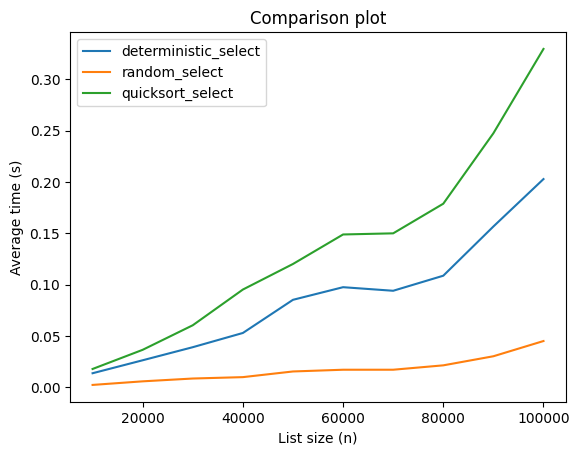

In [10]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 10000  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [deterministic_select, random_select, quicksort_select]  # List of algorithms to compare

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm)

The results show that `random_select` consistently outperforms both `deterministic_select` and `quicksort_select`, exhibiting the lowest execution times as the list size grows. The `deterministic_select` algorithm is slower than `random_select` but faster than `quicksort_select`. As expected, `quicksort_select` is the slowest, since it requires fully sorting the array before selection.

## **Conclusion**

This notebook explored and compared three algorithms for finding the i-th smallest element in an unsorted list: `random_select`, `deterministic_select`, and `quicksort_select`. The experimental results clearly show that `random_select` is the most efficient in practice, followed by the `deterministic_select` algorithm. The `quicksort_select` approach, which sorts the entire list before selecting the desired element, was consistently the slowest.

The key takeaway is that if the goal is to find just a single i-th smallest element, it is much more efficient to use a selection algorithm like `random_select` or `deterministic_select` rather than sorting the whole list. Sorting is only necessary if the entire order of elements is required; otherwise, selection algorithms provide significant performance benefits for this specific task.